# EDA

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import calendar
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import re

In [66]:
# Asignamos el path relativo a la variable dir para utilizarla a la hora de consumir los datasets
# Obtener el path actual
dir = os.getcwd()

## Trabajamos sobre los usuarios

In [67]:
user_review_yelp = pd.read_csv(dir+'/Yelp/user_review_yelp.csv')


In [68]:
user_review_yelp.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
1,FT9CFS39sjZxVjCTrDHmdg,Stephanie,201,2010-06-14 21:44:28,555,141,203,"2015,2016","ElaFwOTdEpkiYPkHMpOwXQ, nbnftigv3fj8oS6k-waLYQ...",5,...,0,0,0,0,11,8,21,21,12,0
2,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,167,206,395,130,915,3396,1915,1915,696,470
3,OlJ9vcVFB1iEKcZO-MS3cQ,Joz Joz Joz,348,2006-03-03 08:10:12,2063,1260,1537,"2006,2007,2008,2009,2010,2011,2012","iBeN7TtSJrq-dLwj-EevFw, oSN3M4_WKdlTsnpgqPDiBg...",116,...,32,27,47,6,183,543,462,462,87,29
4,rppTTi-kfF8-qyiArNemag,Helen,460,2006-01-24 14:33:32,700,149,425,"2010,2012,2013,2014,2015,2016,2017,2018","HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...",49,...,11,2,2,0,16,23,43,43,20,25


In [69]:
# No todos los usuarios que dejaron reviews en los hoteles tuvieron la categoría elite
user_review_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47895 entries, 0 to 47894
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             47895 non-null  object 
 1   name                47895 non-null  object 
 2   review_count        47895 non-null  int64  
 3   yelping_since       47895 non-null  object 
 4   useful              47895 non-null  int64  
 5   funny               47895 non-null  int64  
 6   cool                47895 non-null  int64  
 7   elite               12205 non-null  object 
 8   friends             47895 non-null  object 
 9   fans                47895 non-null  int64  
 10  average_stars       47895 non-null  float64
 11  compliment_hot      47895 non-null  int64  
 12  compliment_more     47895 non-null  int64  
 13  compliment_profile  47895 non-null  int64  
 14  compliment_cute     47895 non-null  int64  
 15  compliment_list     47895 non-null  int64  
 16  comp

In [70]:
user_tip_yelp = pd.read_csv(dir+'/Yelp/user_tip_yelp.csv')


In [71]:
user_tip_yelp.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
1,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,167,206,395,130,915,3396,1915,1915,696,470
2,-TT5e-YQU9xLb1JAGCGkQw,Daniel,183,2008-06-01 18:09:54,258,88,105,"2010,2011,2012,2013","0TdaqdHt6-yoOzpwpbghPQ, 3ZFVrX16ixrCa3qfU4RpAw...",11,...,0,0,0,0,10,15,7,7,11,5
3,3zxy3LVBV3ttxoYbY4rQ8A,Farrah,2073,2008-05-12 09:13:06,27350,11667,17603,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","RtUkSBvInr8mi6-I-PQWoA, rZu5M6e0KtjGJfy_-YqCPQ...",2073,...,180,171,247,162,1575,8734,2651,2651,755,588
4,0G-QF457q_0Z_jKqh6xWiA,Joi,2009,2008-03-12 19:13:45,27137,14049,20385,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","K8h4ypoVZAnmhC2dHKsDrQ, 7nS_R5h4YiZjgH532k_8gA...",944,...,129,105,152,76,2073,6409,2442,2442,1117,462


In [72]:
# No todos los usuarios que dejaron tips en los hoteles tuvieron la categoría elite
user_tip_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             4314 non-null   object 
 1   name                4314 non-null   object 
 2   review_count        4314 non-null   int64  
 3   yelping_since       4314 non-null   object 
 4   useful              4314 non-null   int64  
 5   funny               4314 non-null   int64  
 6   cool                4314 non-null   int64  
 7   elite               1796 non-null   object 
 8   friends             4314 non-null   object 
 9   fans                4314 non-null   int64  
 10  average_stars       4314 non-null   float64
 11  compliment_hot      4314 non-null   int64  
 12  compliment_more     4314 non-null   int64  
 13  compliment_profile  4314 non-null   int64  
 14  compliment_cute     4314 non-null   int64  
 15  compliment_list     4314 non-null   int64  
 16  compli

## Trabajamos sobre los hotels

In [73]:
hotels_yelp = pd.read_csv(dir+'/Yelp/hotels_yelp.csv')

In [74]:
hotels_yelp.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,xM6LoUcnpDpMBzXs_7dXAg,Fairfield Inn & Suites,719 E Baltimore Pike,Kennett Square,AB,19348,39.856248,-75.694610,3.0,37.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Hotels & Travel, Event Planning & Serv...",NaN
1,1,hUQ9Z7kQeabvhPOAQOVV1A,Rathbone Mansions,1244 Esplanade Ave,New Orleans,IN,70116,29.967055,-90.065828,3.5,67.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Hotels & Travel, Bed & Breakfast, Even...",NaN
2,2,xloFoRiYlH4IKGz3FhTDpA,1-275 Rest Area Manatee County Mile 7,13018 Rest Area,Terra Ceia,LA,34250,27.584300,-82.613950,4.0,5.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Rest Stops, Event Planning & Services,...",NaN
3,3,XTWGzxXdQN0DVVH2GPGwiA,Days Inn by Wyndham Reno South,"5851 S Virginia St, No.101",Reno,IN,89502,39.472575,-119.788467,2.0,27.0,0.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
4,4,PXI7kvSV-NvWcqbI9jlmtg,Best Western Cedar Park Inn,5116 Gateway Boulevard,Edmonton,AZ,T6H 2H4,53.488591,-113.493509,3.0,17.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Event Planning & Services, Hotels & Tr...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."


In [75]:
hotels_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    836 non-null    int64  
 1   business_id   836 non-null    object 
 2   name          836 non-null    object 
 3   address       836 non-null    object 
 4   city          836 non-null    object 
 5   state         836 non-null    object 
 6   postal_code   836 non-null    object 
 7   latitude      836 non-null    float64
 8   longitude     836 non-null    float64
 9   stars         836 non-null    float64
 10  review_count  836 non-null    float64
 11  is_open       836 non-null    float64
 12  attributes    786 non-null    object 
 13  categories    836 non-null    object 
 14  hours         633 non-null    object 
dtypes: float64(5), int64(1), object(9)
memory usage: 98.1+ KB


### Graficamos el promedio de estrellas de hotel por estado

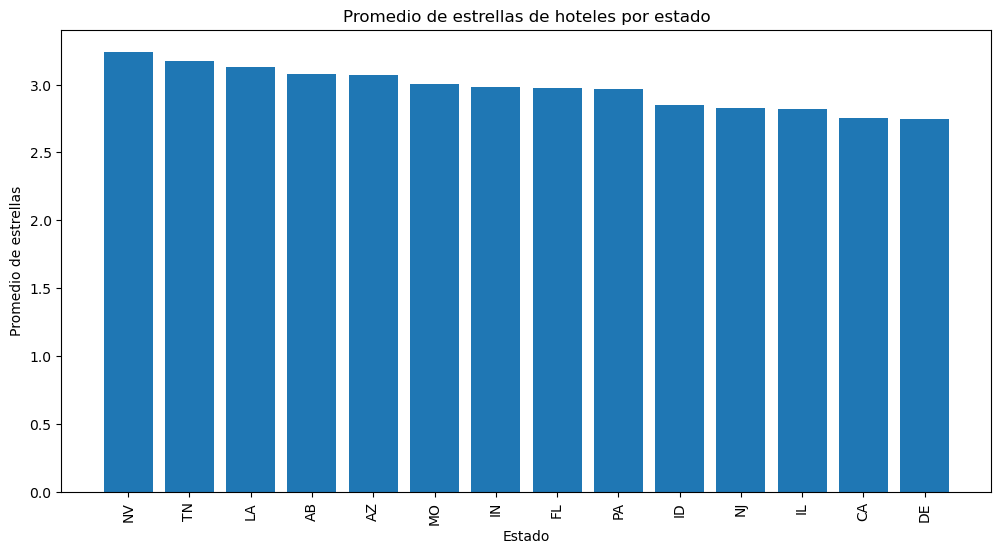

In [76]:
state_stars = hotels_yelp.groupby('state')['stars'].mean().reset_index()


state_stars = state_stars.sort_values('stars', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(state_stars['state'], state_stars['stars'])
plt.xlabel('Estado')
plt.ylabel('Promedio de estrellas')
plt.title('Promedio de estrellas de hoteles por estado')
plt.xticks(rotation=90)
plt.show()

### Graficamos la cantidad de estados hoteles por estado

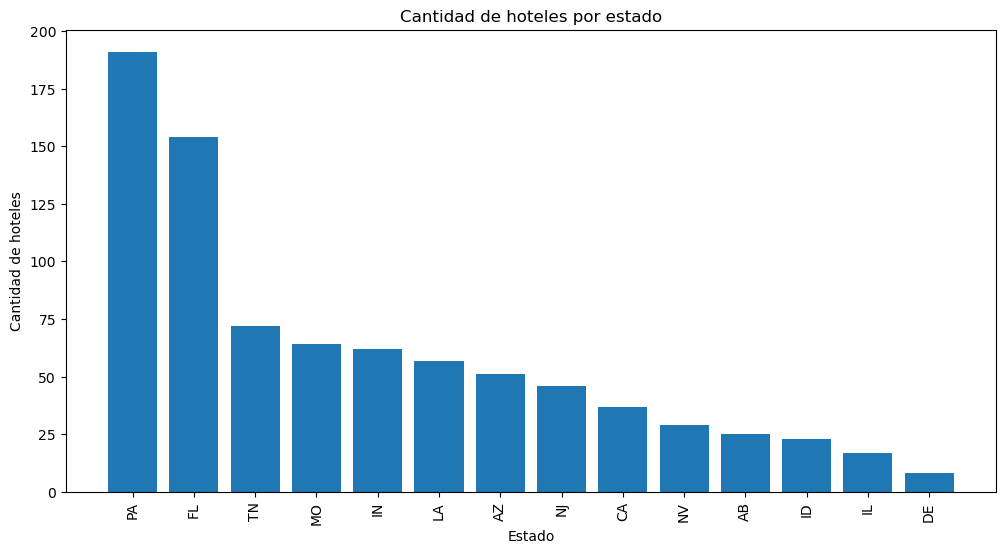

In [77]:
n_hotel_state = hotels_yelp['state'].value_counts().reset_index()
n_hotel_state.columns = ['state', 'hotel_count']

plt.figure(figsize=(12, 6))
plt.bar(n_hotel_state['state'], n_hotel_state['hotel_count'])
plt.xlabel('Estado')
plt.ylabel('Cantidad de hoteles')
plt.title('Cantidad de hoteles por estado')
plt.xticks(rotation=90)
plt.show()

## Trabajamos sobre los checkins

In [78]:
checkin_yelp = pd.read_csv(dir+'/Yelp/checkin_yelp.csv')

In [79]:
checkin_yelp.head()

,business_id,date
0,-1ueCbvIpUPi8KT95ETTKw,"2010-11-09 00:23:41, 2010-11-19 06:54:43, 2010..."
1,-5ktM-ceWcU7fU9op35rpg,"2012-09-03 01:10:44, 2012-09-27 01:35:56, 2015..."
2,-7pCvqW8TFs9nBEwlwqNcQ,"2011-09-19 04:21:52, 2011-12-03 02:39:16, 2012..."
3,-8wxCs5UMpo5vkutnwHmbA,"2010-08-23 01:43:30, 2011-04-02 15:21:37, 2012..."
4,-Eyt2U9zfgp0Kqgj-CjPDg,"2010-05-09 04:24:12, 2010-08-24 14:23:39, 2010..."


In [80]:
checkin_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  812 non-null    object
 1   date         812 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB


## Trabajamos sobre reviews

In [81]:
review_yelp = pd.read_csv(dir+'/Yelp/review_yelp.csv')

In [82]:
review_yelp.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4,0,0,0,"Comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09
1,O2QGOa66t5BCYDvxLiOtbA,ysU9kNZiFXY7MrFWVIUaTg,cB_9eHHfo9me96cZup-lZQ,1,1,0,0,We stayed at The Saint last year for a girl's ...,2017-04-19 14:16:21
2,Lj1TAURE_hYtPW3IlhKWMg,tWJoKvHynA8h8dFXUExekw,9xm4aIAT_xwRoTxc0_8AWQ,5,0,1,0,Stayed here three nights on business. The pro...,2015-02-16 14:00:30
3,NzvlG7XNjk5cKaCPtZa-eA,3F9mJBT6zQz9CaNo4bAr7g,P61ecBVVPgBm-zH_SYq8FA,5,0,0,0,This is one of the best hotels I have ever sta...,2015-08-30 17:27:44
4,NbT7iIVr8rz6tglE7tYTAg,H4JNrBAoyCk_ZMZWbAf8OA,oEbpO3vmcrGDW2mtb_s8cQ,4,1,0,0,Located right at the Union Station Metro stop ...,2007-05-23 08:03:29


In [83]:
review_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43437 entries, 0 to 43436
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    43437 non-null  object
 1   user_id      43437 non-null  object
 2   business_id  43437 non-null  object
 3   stars        43437 non-null  int64 
 4   useful       43437 non-null  int64 
 5   funny        43437 non-null  int64 
 6   cool         43437 non-null  int64 
 7   text         43437 non-null  object
 8   date         43437 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.0+ MB


### Graficamos nro de reviews por estado

In [84]:
# Fusionamos los DataFrames en base a la columna 'business_id'
merged_df = review_yelp.merge(hotels_yelp, on='business_id', how='left')

# Crear 'review_state' con las columnas 'text' y 'state'
review_state = merged_df[['text', 'state']]

In [85]:
review_state.head()

,text,state
0,"Comfortable bed, good breakfast, fast internet...",NV
1,We stayed at The Saint last year for a girl's ...,MO
2,Stayed here three nights on business. The pro...,FL
3,This is one of the best hotels I have ever sta...,LA
4,Located right at the Union Station Metro stop ...,NV


In [86]:
review_count = review_state.groupby('state')['text'].count().reset_index(name='review_count')
review_count

,state,review_count
0,AB,1899
1,AZ,3191
2,CA,2589
3,DE,154
4,FL,6214
5,ID,626
6,IL,545
7,IN,3132
8,LA,3284
9,MO,3477


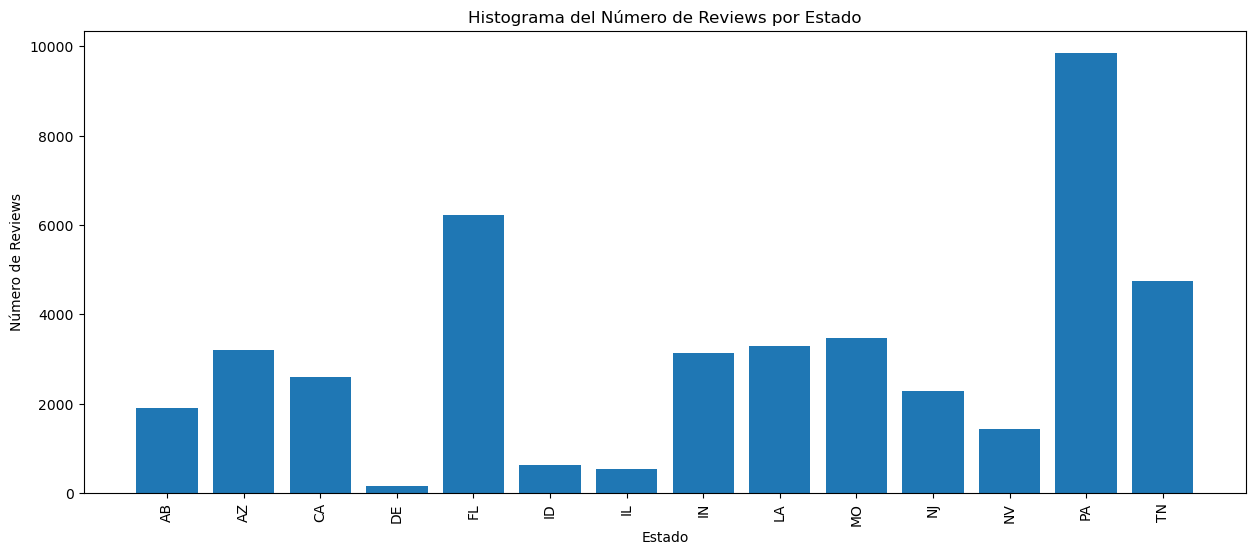

In [87]:
# Histograma de cantidad de reviews por Estado
# Crear el histograma
plt.figure(figsize=(15, 6))
plt.bar(review_count['state'], review_count['review_count'])
plt.xlabel('Estado')
plt.ylabel('Número de Reviews')
plt.title('Histograma del Número de Reviews por Estado')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [88]:
# Correlación entre número de hoteles y número de reviews

corr = pd.merge(review_count, n_hotel_state, on=['state'])
corr

,state,review_count,hotel_count
0,AB,1899,25
1,AZ,3191,51
2,CA,2589,37
3,DE,154,8
4,FL,6214,154
5,ID,626,23
6,IL,545,17
7,IN,3132,62
8,LA,3284,57
9,MO,3477,64


### Calculamos la correlación entre la cantidad de reviews y el número de hoteles por estado

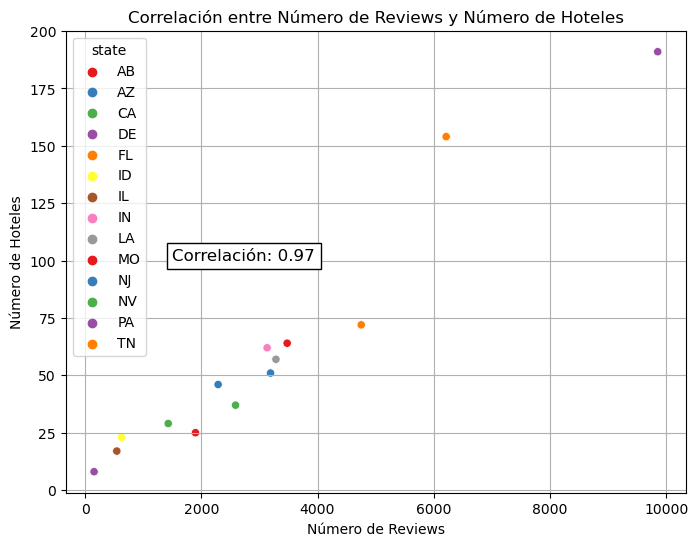

In [89]:

# Calcular la correlación

correlation = corr['review_count'].corr(corr['hotel_count'])

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_count', y='hotel_count', hue='state', data=corr, palette='Set1')
plt.xlabel('Número de Reviews')
plt.ylabel('Número de Hoteles')
plt.title('Correlación entre Número de Reviews y Número de Hoteles')
plt.grid(True)
plt.text(1500, 100, f'Correlación: {correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

### Calculamos el ratio entre la cantidad de reviews y el número de hoteles por estado

In [90]:
corr['ratio'] = corr['review_count'] / corr['hotel_count']

In [91]:
corr

,state,review_count,hotel_count,ratio
0,AB,1899,25,75.960000
1,AZ,3191,51,62.568627
2,CA,2589,37,69.972973
3,DE,154,8,19.250000
4,FL,6214,154,40.350649
5,ID,626,23,27.217391
6,IL,545,17,32.058824
7,IN,3132,62,50.516129
8,LA,3284,57,57.614035
9,MO,3477,64,54.328125


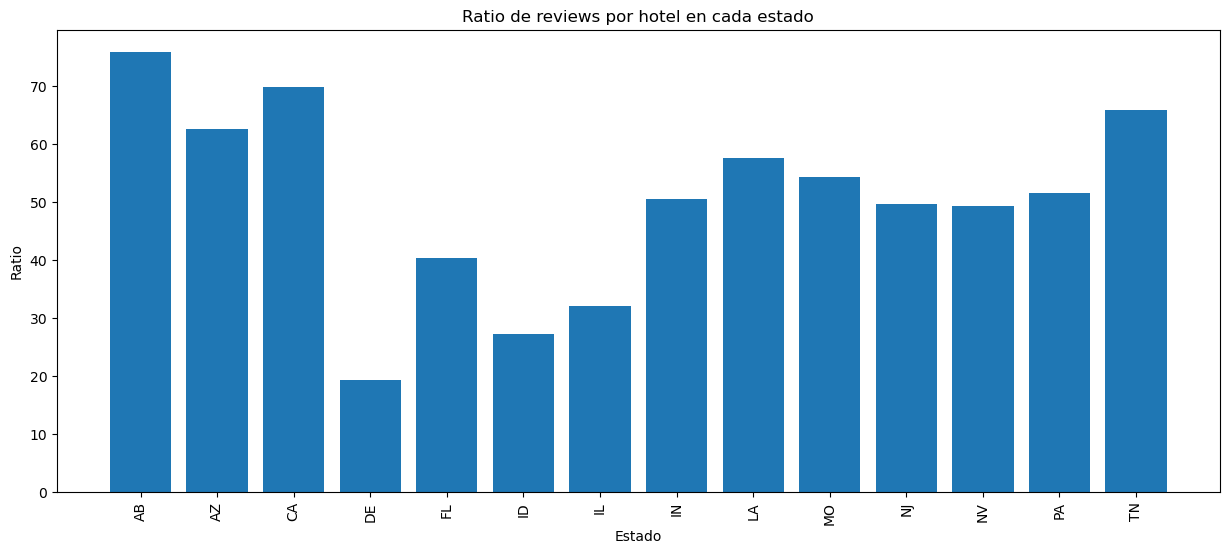

In [92]:
# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(corr['state'], corr['ratio'])
plt.xlabel('Estado')
plt.ylabel('Ratio')
plt.title('Ratio de reviews por hotel en cada estado')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

### Cantidad de reviews por año

In [93]:
review_yelp['date'][1]

'2017-04-19 14:16:21'

In [94]:
review_yelp_datetime = review_yelp.copy()

In [95]:
def str_to_datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
#  Convertir la columna 'fecha_str' a objetos datetime
review_yelp_datetime['date'] = review_yelp_datetime['date'].apply(str_to_datetime)

In [96]:
# Reviews por año
reviews_anio = review_yelp_datetime.groupby(review_yelp_datetime['date'].dt.year)['text'].count().reset_index(name='review_count')
reviews_anio

,date,review_count
0,2005,8
1,2006,29
2,2007,108
3,2008,265
4,2009,517
5,2010,955
6,2011,1542
7,2012,1959
8,2013,2496
9,2014,3532


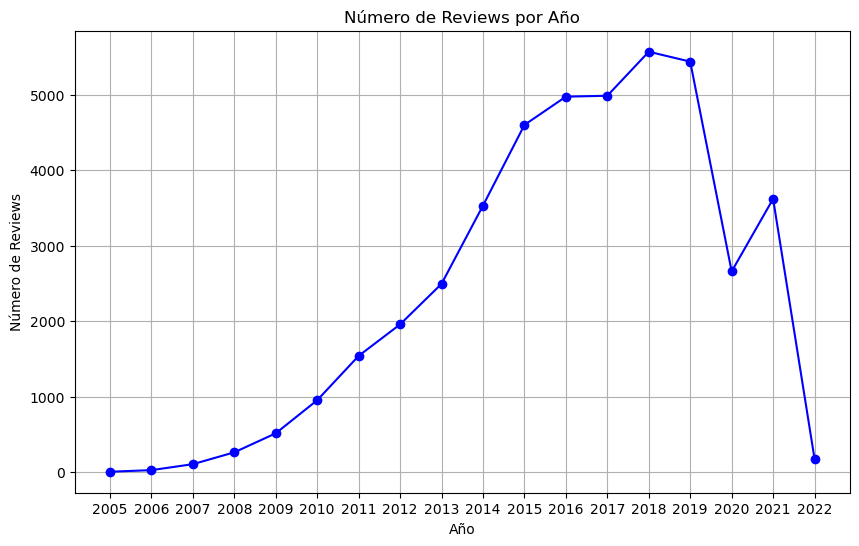

In [97]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(reviews_anio['date'], reviews_anio['review_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Número de Reviews')
plt.title('Número de Reviews por Año')
plt.xticks(reviews_anio['date'])
plt.grid(True)
plt.show()

### Cantidad de reviews por mes

In [98]:
df = review_yelp_datetime.copy()
# Obtener el nombre del mes y ordenarlos por el orden deseado
month_order = list(calendar.month_name)[1:]  # Lista de meses sin el primer elemento vacío
df['month'] = review_yelp_datetime['date'].dt.month.map(lambda x: calendar.month_name[x])
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Reviews por mes ordenados por el orden deseado
reviewsmes = df.groupby('month')['text'].count().reset_index(name='review_count')
print(reviewsmes)

        month  review_count
0     January          3280
1    February          3045
2       March          3782
3       April          3543
4         May          3599
5        June          3995
6        July          4516
7      August          4089
8   September          3694
9     October          3690
10   November          3170
11   December          3034


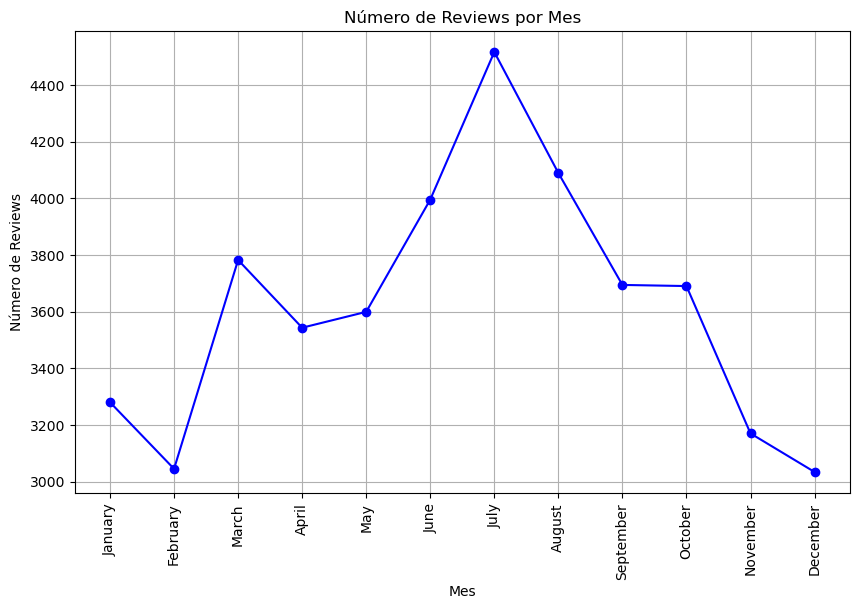

In [99]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(reviewsmes['month'], reviewsmes['review_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Mes')
plt.ylabel('Número de Reviews')
plt.title('Número de Reviews por Mes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [100]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,month
0,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4,0,0,0,"Comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09,August
1,O2QGOa66t5BCYDvxLiOtbA,ysU9kNZiFXY7MrFWVIUaTg,cB_9eHHfo9me96cZup-lZQ,1,1,0,0,We stayed at The Saint last year for a girl's ...,2017-04-19 14:16:21,April
2,Lj1TAURE_hYtPW3IlhKWMg,tWJoKvHynA8h8dFXUExekw,9xm4aIAT_xwRoTxc0_8AWQ,5,0,1,0,Stayed here three nights on business. The pro...,2015-02-16 14:00:30,February
3,NzvlG7XNjk5cKaCPtZa-eA,3F9mJBT6zQz9CaNo4bAr7g,P61ecBVVPgBm-zH_SYq8FA,5,0,0,0,This is one of the best hotels I have ever sta...,2015-08-30 17:27:44,August
4,NbT7iIVr8rz6tglE7tYTAg,H4JNrBAoyCk_ZMZWbAf8OA,oEbpO3vmcrGDW2mtb_s8cQ,4,1,0,0,Located right at the Union Station Metro stop ...,2007-05-23 08:03:29,May


In [101]:
# avg rating y sentiment por estado
df = merged_df.copy()
# Análisis de sentimiento de los hoteles en general
df['sentiment'] = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Promedio de Análisis de sentimiento de los hoteles en todo el país
sentiment = df.groupby('state')['sentiment'].mean().reset_index(name="sentiment")
promedio_rating_por_state = df.groupby('state')['stars_x'].mean().reset_index(name='avg_rating')
# Merge 
hoteles = pd.merge(promedio_rating_por_state, sentiment, on=('state'))
hoteles

,state,avg_rating,sentiment
0,AB,3.286993,0.188993
1,AZ,3.297712,0.198569
2,CA,2.915798,0.163378
3,DE,2.597403,0.126099
4,FL,3.043611,0.166174
5,ID,2.928115,0.144765
6,IL,2.770642,0.130231
7,IN,3.177522,0.172693
8,LA,3.263703,0.188967
9,MO,3.124245,0.168655


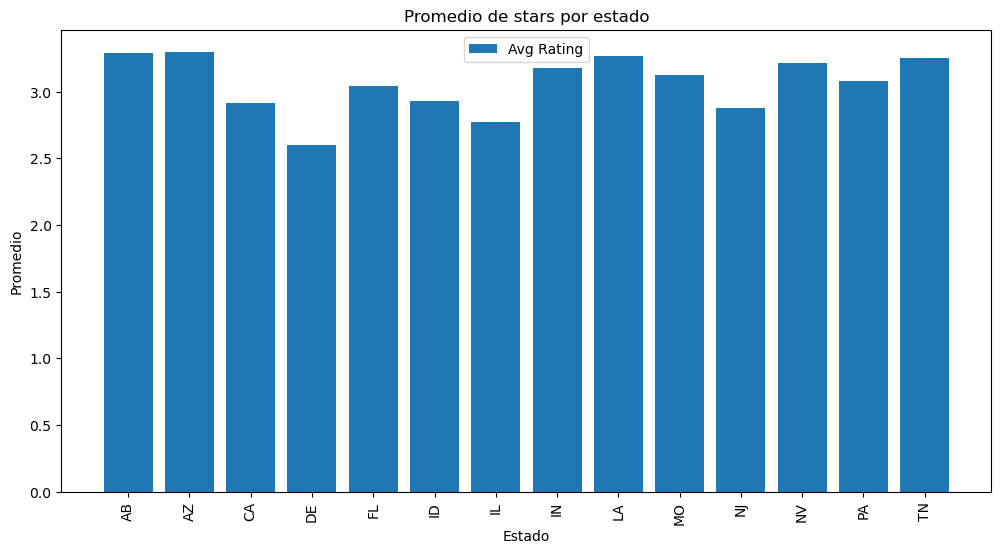

In [102]:
# Gráfico de barras promedio de stars por estado
plt.figure(figsize=(12, 6))
plt.bar(hoteles['state'], hoteles['avg_rating'], label='Avg Rating')
plt.xlabel('Estado')
plt.ylabel('Promedio')
plt.title('Promedio de stars por estado')
plt.xticks(rotation=90)
plt.legend()
plt.grid(False)
plt.show()

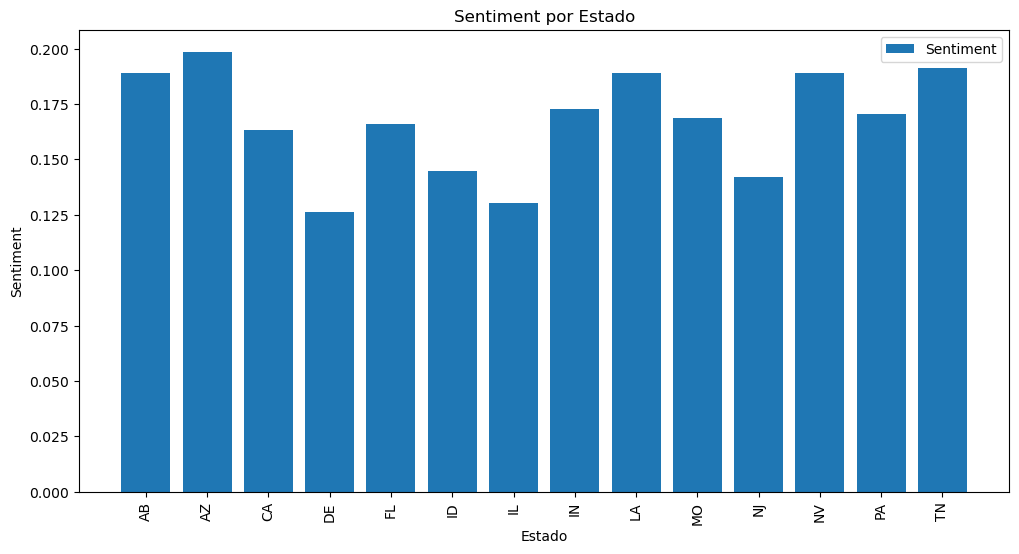

In [103]:
# Gráfico de barras sentimiento por estado
plt.figure(figsize=(12, 6))
plt.bar(hoteles['state'], hoteles['sentiment'], label='Sentiment')
plt.xlabel('Estado')
plt.ylabel('Sentiment')
plt.title('Sentiment por Estado')
plt.xticks(rotation=90)
plt.legend()
plt.grid(False)
plt.show()

### Pre procesando datos para hacer wordclouds

In [104]:
# Lower casing and str type

df['text'] = df["text"].astype(str)
df['text']= df["text"].apply(lambda x: x.lower())

In [105]:
# Checkeamos si hay algun caracter especial
alphabet = string.ascii_letters+string.punctuation
print(df.text.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
    expe = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
    #return expe.findall(s)
    return expe.sub(r"",s)

for y in df["text"]:
    extracted_emojis.append(str(extract_emojis(y)))

True


In [106]:
# stop words

stop_words=stopwords.words('english')
df['extracted_emojis'] = extracted_emojis
df['extracted_emojis']= df['extracted_emojis'].apply(lambda x:x if x not in stop_words else None)

In [107]:
# stemming

def stemming(x):
    st = PorterStemmer()
    if x is not None:
       for word in x.split():
           st.stem(word)

df['extracted_emojis'].apply(lambda x:stemming(x))

0        None
1        None
2        None
3        None
4        None
         ... 
43432    None
43433    None
43434    None
43435    None
43436    None
Name: extracted_emojis, Length: 43437, dtype: object

In [108]:
# Puntaje de sentimiento de la columna 'extracted_emojis'

def senti_sc(x):
    if x is not None:
       return TextBlob(x).polarity

df["sentiment_score"]= df["extracted_emojis"].apply(senti_sc)


df.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,Unnamed: 0,...,longitude,stars_y,review_count,is_open,attributes,categories,hours,sentiment,extracted_emojis,sentiment_score
0,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4,0,0,0,"comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09,25,...,-75.164033,3.0,338.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Event Planning & Services, Caterers, H...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",0.450000,"comfortable bed, good breakfast, fast internet...",0.450000
1,O2QGOa66t5BCYDvxLiOtbA,ysU9kNZiFXY7MrFWVIUaTg,cB_9eHHfo9me96cZup-lZQ,1,1,0,0,we stayed at the saint last year for a girl's ...,2017-04-19 14:16:21,69,...,-90.071392,3.5,316.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Venues & Event Spaces, Event Planning ...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",0.029302,we stayed at the saint last year for a girl's ...,0.029302
2,Lj1TAURE_hYtPW3IlhKWMg,tWJoKvHynA8h8dFXUExekw,9xm4aIAT_xwRoTxc0_8AWQ,5,0,1,0,stayed here three nights on business. the pro...,2015-02-16 14:00:30,40,...,-110.930080,4.5,44.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",0.171515,stayed here three nights on business. the pro...,0.171515
3,NzvlG7XNjk5cKaCPtZa-eA,3F9mJBT6zQz9CaNo4bAr7g,P61ecBVVPgBm-zH_SYq8FA,5,0,0,0,this is one of the best hotels i have ever sta...,2015-08-30 17:27:44,77,...,-90.207588,3.5,329.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Event Planning & Services, Hotels & Tr...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",0.411111,this is one of the best hotels i have ever sta...,0.411111
4,NbT7iIVr8rz6tglE7tYTAg,H4JNrBAoyCk_ZMZWbAf8OA,oEbpO3vmcrGDW2mtb_s8cQ,4,1,0,0,located right at the union station metro stop ...,2007-05-23 08:03:29,39,...,-90.208438,3.5,41.0,0.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hotels, Hotels & Travel, Restaurants, Event Pl...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",0.301190,located right at the union station metro stop ...,0.301190


In [109]:
# Obtener solamente los Hoteles de la Cadena Ramada

# Filtrar las filas donde 'business_name' contiene la palabra "Ramada"
filtro_ramada = df[df['name'].str.contains('Ramada', case=False)]

# Imprimir el DataFrame filtrado
filtro_ramada.shape

(157, 26)

In [110]:
filtro_ramada.groupby('name')['extracted_emojis'].count().reset_index(name='review_count')

,name,review_count
0,Ramada,14
1,Ramada Hazelwood,7
2,Ramada Nashville-Atrium Way,8
3,Ramada Tucson,81
4,Ramada by Wyndham Franklin/Cool Springs,23
5,Ramada by Wyndham La Vergne/Nashville,15
6,Ramada by Wyndham Nashville/Music Valley,9


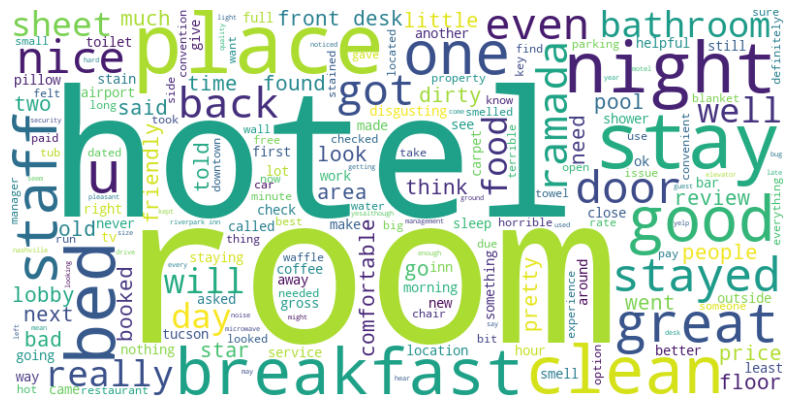

In [111]:
# Crear un WordCloud con las palabras de la columna 'review' de todos los Hoteles Ramada en los estados en los que tiene presencia
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtro_ramada['extracted_emojis']))

# Mostrar el Word Cloud utilizando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Realizamos el análisis de sentimiento

In [112]:


#  Convertir la columna 'date' a objetos datetime
def str_to_datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')


filtro_ramada['sentiment_score'] = filtro_ramada['extracted_emojis'].apply(lambda text: TextBlob(text).sentiment.polarity)
filtro_ramada['date'] = filtro_ramada['date'].apply(str_to_datetime)

# Agrupar los datos por año y calcular el promedio del sentimiento para cada grupo
promedio_sentimiento_por_año = filtro_ramada.groupby(filtro_ramada['date'].dt.year)['sentiment_score'].mean()



C:\Users\Rodri\AppData\Local\Temp\ipykernel_12924\3820382479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_ramada['sentiment_score'] = filtro_ramada['extracted_emojis'].apply(lambda text: TextBlob(text).sentiment.polarity)
C:\Users\Rodri\AppData\Local\Temp\ipykernel_12924\3820382479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_ramada['date'] = filtro_ramada['date'].apply(str_to_datetime)


In [113]:
promedio_sentimiento_por_año = pd.DataFrame(promedio_sentimiento_por_año)
promedio_sentimiento_por_año.reset_index(inplace=True)

In [114]:
promedio_sentimiento_por_año

,date,sentiment_score
0,2009,0.178674
1,2010,0.080621
2,2011,0.085018
3,2012,-0.083721
4,2013,0.184935
5,2014,0.101590
6,2015,0.112944
7,2016,0.159841
8,2017,0.070502
9,2018,0.044189


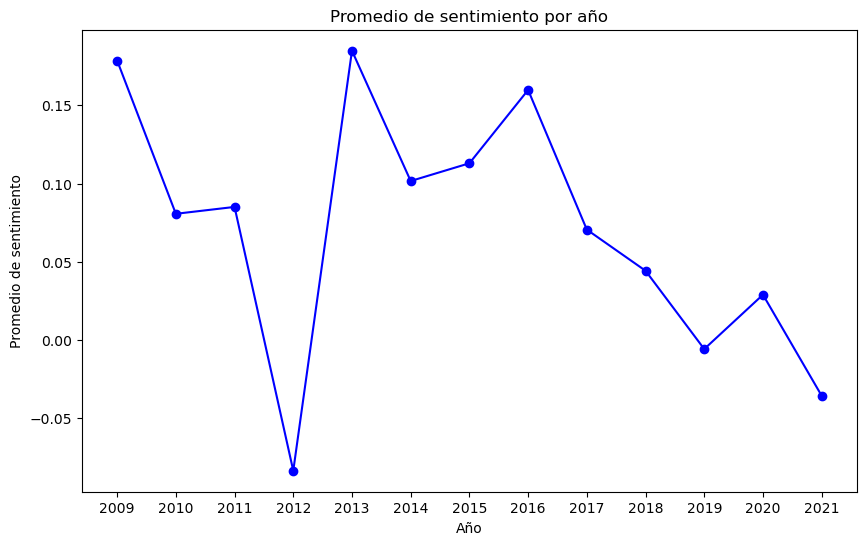

In [115]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(promedio_sentimiento_por_año['date'], promedio_sentimiento_por_año['sentiment_score'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Promedio de sentimiento')
plt.title('Promedio de sentimiento por año')
plt.xticks(promedio_sentimiento_por_año['date'])
plt.grid(False)
plt.show()

### Creamos gráfico de relación entre el sentimiento promedio y el rating promedio

In [116]:
filtro_ramada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 4780 to 38760
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   review_id         157 non-null    object        
 1   user_id           157 non-null    object        
 2   business_id       157 non-null    object        
 3   stars_x           157 non-null    int64         
 4   useful            157 non-null    int64         
 5   funny             157 non-null    int64         
 6   cool              157 non-null    int64         
 7   text              157 non-null    object        
 8   date              157 non-null    datetime64[ns]
 9   Unnamed: 0        157 non-null    int64         
 10  name              157 non-null    object        
 11  address           157 non-null    object        
 12  city              157 non-null    object        
 13  state             157 non-null    object        
 14  postal_code       157

In [117]:
sentiment

,state,sentiment
0,AB,0.188993
1,AZ,0.198569
2,CA,0.163378
3,DE,0.126099
4,FL,0.166174
5,ID,0.144765
6,IL,0.130231
7,IN,0.172693
8,LA,0.188967
9,MO,0.168655


In [118]:
# Hoteles Ramada por Estado con su AvgRating y sentimiento para determinar bajas calificaciones y en qué Estados Y/o hoteles se debe actuar primero
# Promedio de Análisis de sentimiento de los hoteles en los estados elegidos
sentiment = filtro_ramada.groupby(['state', 'name'])['sentiment'].mean().reset_index(name="sentiment")
# Número de hoteles ramada por estado
business_name_counts = filtro_ramada.groupby('state')['name'].value_counts().reset_index(name='counts')
promedio_rating_por_business_name = filtro_ramada.groupby(['state', 'name'])['stars_x'].mean().reset_index(name='avg_rating')
# Merge 
m1 = pd.merge(business_name_counts, promedio_rating_por_business_name, on=['name', 'state'])
ramada = pd.merge(m1, sentiment, on=['name', 'state'])
ramada

,state,name,counts,avg_rating,sentiment
0,AZ,Ramada Tucson,81,2.493827,0.102967
1,AZ,Ramada by Wyndham Franklin/Cool Springs,23,1.434783,-0.013912
2,AZ,Ramada Nashville-Atrium Way,8,1.625000,0.030930
3,FL,Ramada,14,1.857143,-0.041858
4,IL,Ramada by Wyndham La Vergne/Nashville,15,3.200000,0.176688
5,MO,Ramada by Wyndham Nashville/Music Valley,9,1.000000,-0.147928
6,PA,Ramada Hazelwood,7,1.428571,-0.035833


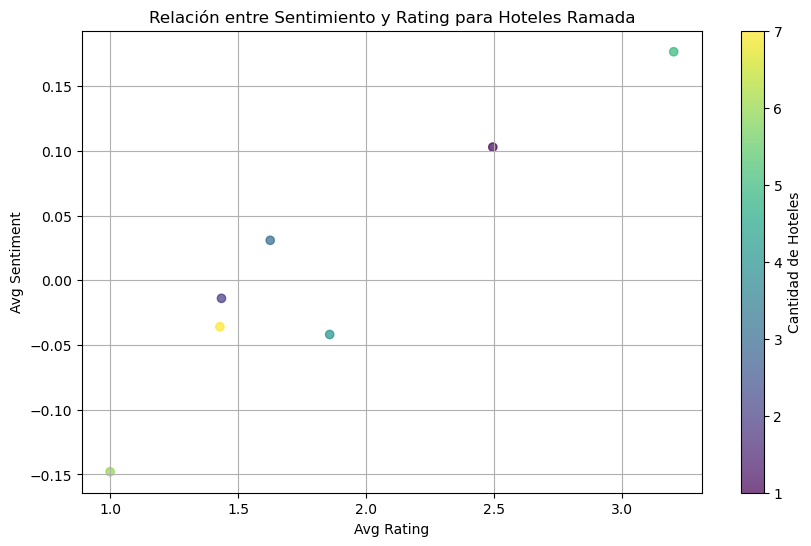

In [119]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(ramada['avg_rating'], ramada['sentiment'], c=range(1, len(ramada['avg_rating']) + 1), cmap='viridis', alpha=0.7)
plt.xlabel('Avg Rating')
plt.ylabel('Avg Sentiment')
plt.title('Relación entre Sentimiento y Rating para Hoteles Ramada')
plt.colorbar(label='Cantidad de Hoteles')
plt.grid(True)
plt.show()

### Realizamos el mapa de correlación entre variables

In [ ]:
df_corr = df.copy()

In [127]:

columns_drop = ['review_id','user_id','business_id','text','date',
'Unnamed: 0','name','address','city','state','attributes','categories',
'hours','sentiment','extracted_emojis']

df_corr.drop(columns=columns_drop, inplace=True)
df_corr = df_corr.rename(columns={'stars_x': 'review_rating','stars_y': 'hotel_rating'})

In [128]:
df_corr.head()

,review_rating,useful,funny,cool,postal_code,latitude,longitude,hotel_rating,review_count,is_open,sentiment_score
0,4,0,0,0,19107,39.947903,-75.164033,3.0,338.0,1.0,0.450000
1,1,1,0,0,70112,29.955077,-90.071392,3.5,316.0,1.0,0.029302
2,5,0,1,0,85756,32.132213,-110.930080,4.5,44.0,1.0,0.171515
3,5,0,0,0,63103,38.628166,-90.207588,3.5,329.0,1.0,0.411111
4,4,1,0,0,63101,38.629528,-90.208438,3.5,41.0,0.0,0.301190


C:\Users\Rodri\AppData\Local\Temp\ipykernel_12924\2481659868.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlations.corr(), dtype=np.bool))


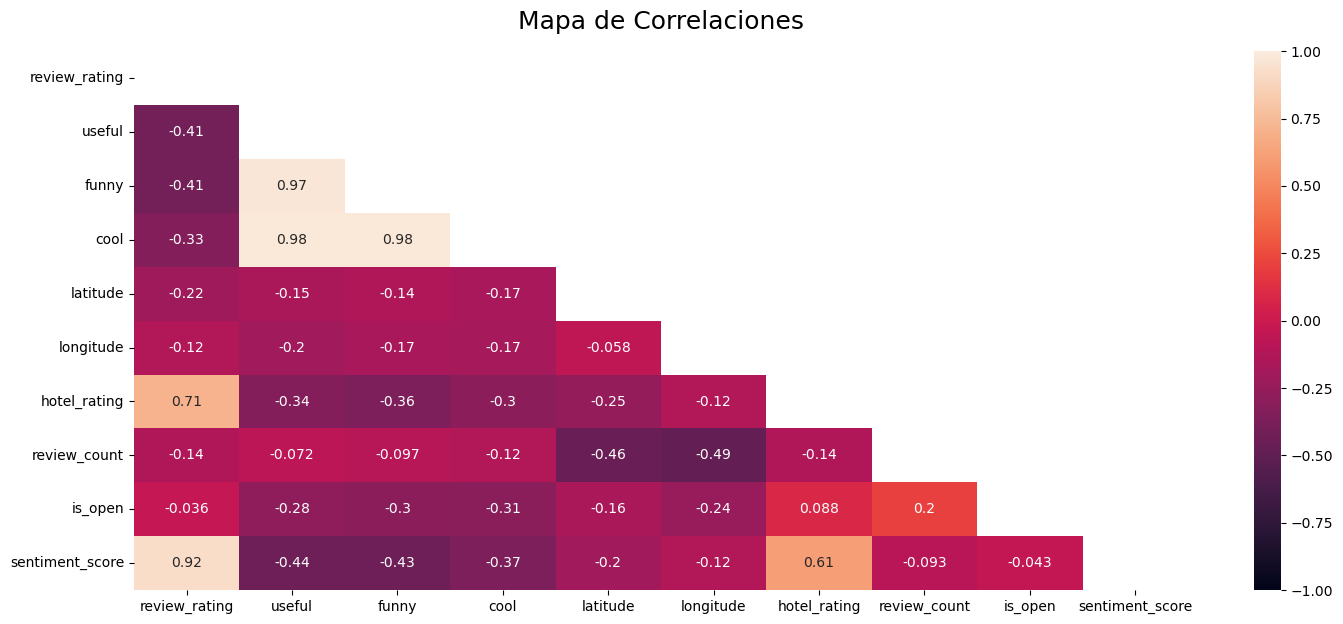

In [131]:
# Mapa de Correlación de Variables Numericas
correlations = df_corr.select_dtypes(include = ["number"]).corr()
plt.figure(figsize=(17, 7))
mask = np.triu(np.ones_like(correlations.corr(), dtype=np.bool))
heatmap = sns.heatmap(correlations.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Mapa de Correlaciones', fontdict={'fontsize':18}, pad=16);
